In [36]:
import pandas as pd
import os
import scipy.stats
import numpy as np
from sklearn import svm
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split, GridSearchCV, LeaveOneOut
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [37]:
path="clintab_GMQL/res_seq/files/"

listdf_r=[]

for fname in os.listdir(path):
    if fname.endswith(".meta"): 
        pass
    elif fname.endswith(".gdm"): 
        
        tempdf=pd.read_csv(path+fname, delimiter="\t", header=None)
        
        tempdf["genes"]=tempdf[4]+"-"+tempdf[6]
        tempdf["fpkm-uq"]=tempdf[10]
        tempdf=tempdf[["genes", "fpkm-uq"]]
        tempdf["fname"]=fname
        
        listdf_r.append(tempdf)

In [38]:
path="clintab_GMQL/sens_long_32/files/"

listdf_sl=[]

for fname in os.listdir(path):
    if fname.endswith(".meta"): 
        pass
    elif fname.endswith(".gdm"): 
        
        tempdf=pd.read_csv(path+fname, delimiter="\t", header=None)
        
        tempdf["genes"]=tempdf[4]+"-"+tempdf[6]
        tempdf["fpkm-uq"]=tempdf[10]
        tempdf=tempdf[["genes", "fpkm-uq"]]
        tempdf["fname"]=fname
        
        listdf_sl.append(tempdf)

In [39]:
path="clintab_GMQL/sens_short_6_32/files/"

listdf_ss=[]

for fname in os.listdir(path):
    if fname.endswith(".meta"): 
        pass
    elif fname.endswith(".gdm"): 
        
        tempdf=pd.read_csv(path+fname, delimiter="\t", header=None)
        
        tempdf["genes"]=tempdf[4]+"-"+tempdf[6]
        tempdf["fpkm-uq"]=tempdf[10]
        tempdf=tempdf[["genes", "fpkm-uq"]]
        tempdf["fname"]=fname
        
        listdf_ss.append(tempdf)

In [40]:
totaldf_ss=pd.concat(listdf_ss)
totaldf_ss.columns=["gene", "s_value", "patient"]
totaldf_ss

,gene,s_value,patient
0,ENSG00000223972.5-DDX11L1,0.007663,S_00098.gdm
1,ENSG00000227232.5-WASH7P,0.925051,S_00098.gdm
2,ENSG00000278267.1-MIR6859-3,0.000000,S_00098.gdm
3,ENSG00000243485.3-RP11-34P13.3,0.000000,S_00098.gdm
4,ENSG00000274890.1-MIR1302-9,0.000000,S_00098.gdm
5,ENSG00000237613.2-FAM138A,0.010907,S_00098.gdm
6,ENSG00000268020.3-OR4G4P,0.000000,S_00098.gdm
7,ENSG00000240361.1-OR4G11P,0.000000,S_00098.gdm
8,ENSG00000186092.4-OR4F5,0.000000,S_00098.gdm
9,ENSG00000238009.5-RP11-34P13.7,0.003568,S_00098.gdm


In [41]:
totaldf_sl=pd.concat(listdf_sl)
totaldf_sl.columns=["gene", "s_value", "patient"]

In [42]:
pivoteddf_ss=totaldf_ss.pivot(index="patient", columns="gene", values="s_value")
pivoteddf_ss.shape

(109, 60483)

In [43]:
pivoteddf_sl=totaldf_sl.pivot(index="patient", columns="gene", values="s_value")
pivoteddf_sl.shape

(34, 60483)

trasposta=np.transpose(pivoteddf_sl)

genes=[]

for x in ["-".join(x.strip().split("-")[1:])  for x in (trasposta.index)]:
    genes.append(x)  

trasposta['genes']=genes
sel_col=[f for f in trasposta.columns if ("gene" in f or "genes"in f)]
trasposta=trasposta[sel_col]
#trasposta
trasposta.to_csv('genes_list_sl.csv', sep='\t')

In [44]:
list_pv=[]


for g in (pivoteddf_ss.columns): 
    c1=pivoteddf_ss[g].values
    c2=pivoteddf_sl[g].values
    m1=np.median(c1)
    m2=np.median(c2)
    
    if m1==0.0 and m2==0.0:
        pass
    else:
    
        try: 

            #pv=scipy.stats.ttest_ind(c1,c2).pvalue
            pv=scipy.stats.mannwhitneyu(c1,c2).pvalue
            
            if pv<0.001:
                list_pv.append((g,pv,m1,m2))
                #print(g,pv,m1,m2)

        except:
            pass

In [45]:
results=sorted(list_pv, key=lambda x:x[1])
len(results)


#for h in ["\t".join(map (str,list(x))) for x in results]:
     
dataset_result=pd.DataFrame(results)
#results

In [46]:
dataset_result["sum"]=dataset_result[2]+dataset_result[3]
new_ds=dataset_result[dataset_result["sum"]>10]
#new_ds.shape
new_ds.columns=['ensemble_name', 'p_value', 'median_1', 'median_2', 'sum']

In [47]:
names=[]

for x in ["-".join(x.strip().split("-")[1:])  for x in (new_ds['ensemble_name'])]:
    names.append(x)    

In [48]:
new_ds['gene_symbol']=names
new_ds.head()
#new_ds.to_csv('genes_sl_vs_ss.csv', sep='\t')

/home/lalli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,ensemble_name,p_value,median_1,median_2,sum,gene_symbol
3,ENSG00000171311.11-EXOSC1,0.000018,7.347007,10.670756,18.017763,EXOSC1
4,ENSG00000118242.14-MREG,0.000022,5.290575,8.046079,13.336654,MREG
7,ENSG00000166444.16-ST5,0.000050,6.605089,4.554177,11.159265,ST5
8,ENSG00000119888.9-EPCAM,0.000087,134.210991,166.623280,300.834272,EPCAM
10,ENSG00000137393.9-RNF144B,0.000091,8.364519,15.532160,23.896678,RNF144B


In [49]:
column=(dataset_result[0])
#column=list(dataset_result[0])

In [50]:
pivoteddf_ss_selected=pivoteddf_ss[column]
pivoteddf_ss_selected["label"]=0
pivoteddf_ss_selected.shape

/home/lalli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(109, 128)

In [51]:
pivoteddf_sl_selected=pivoteddf_sl[column]
pivoteddf_sl_selected["label"]=1
pivoteddf_sl_selected.shape

/home/lalli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(34, 128)

In [52]:
concatenated=pd.concat([pivoteddf_sl_selected, pivoteddf_ss_selected])

In [53]:
X=concatenated[concatenated.columns[:-1]].values
y=concatenated[concatenated.columns[-1]].values

In [54]:
clf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=0)

In [55]:
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [56]:
clf.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [57]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=20, random_state=36851234)

In [58]:
def my_PCA(x, features, labels, i, j):
    #x = data.loc[:, features].values
    x = StandardScaler().fit_transform(x)
    
    pca= PCA(n_components=3)
    p_comp=pca.fit_transform(x)
    print(pca.explained_variance_ratio_)
    p_comp=p_comp[:, [i,j]]
    
    principalDf = pd.DataFrame(data = p_comp
             , columns = ['principal component '+str(i+1), 'principal component '+str(j+1)])
    finalDf= pd.concat([principalDf, pd.Series(labels)], axis=1)
    
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component '+str(i+1), fontsize = 15)
    ax.set_ylabel('Principal Component '+str(j+1), fontsize = 15)
    ax.set_title('2 Component PCA', fontsize = 20)


    #targets = ['Sens_l', 'Resistant', 'Sens_s']
    targets = ['Sens_l', 'Sens_s']
    colors = ['r', 'g']
    for target, color in zip(targets,colors):
        t=0
        if target == 'Sens_l':
            t=1
        
            
        indicesToKeep = finalDf[0] == t
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component '+str(i+1)]
                   , finalDf.loc[indicesToKeep, 'principal component '+str(j+1)]
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()

[0.13940999 0.06061868 0.03585433]


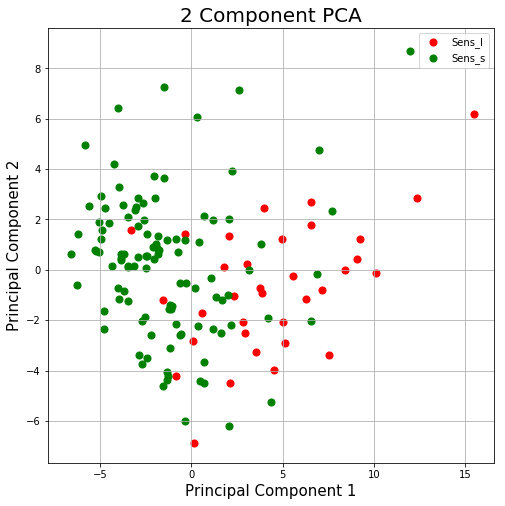

In [59]:
my_PCA(X, concatenated.columns, y, 0, 1)

In [60]:
accuracy=[]
precision=[]
recall=[]

loo = LeaveOneOut()
loo.get_n_splits(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

  
#clf = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=0)
clf = svm.SVC(kernel='rbf', class_weight='balanced')
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=3,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

    clf.fit(X_train, y_train)
    y_predict=clf.predict(X_test)
    
    accuracy.append(accuracy_score(y_test, y_predict))
    precision.append(precision_score(y_test, y_predict))
    recall.append(recall_score(y_test, y_predict))

# Tuning hyper-parameters for precision



/home/lalli/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lalli/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lalli/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lalli/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lalli/anaconda3/li

Best parameters set found on development set:

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

Grid scores on development set:

0.393 (+/-0.010) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.851 (+/-0.155) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.393 (+/-0.010) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.672 (+/-0.114) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.393 (+/-0.010) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.643 (+/-0.057) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.393 (+/-0.010) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.643 (+/-0.057) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.543 (+/-0.026) for {'C': 1, 'kernel': 'linear'}
0.543 (+/-0.026) for {'C': 10, 'kernel': 'linear'}
0.543 (+/-0.026) for {'C': 100, 'kernel': 'linear'}
0.543 (+/-0.026) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             

/home/lalli/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lalli/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lalli/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lalli/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lalli/anaconda3/li

Best parameters set found on development set:

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

Grid scores on development set:

0.500 (+/-0.000) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.580 (+/-0.039) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.500 (+/-0.000) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.595 (+/-0.034) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.500 (+/-0.000) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.589 (+/-0.029) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.500 (+/-0.000) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.589 (+/-0.029) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.559 (+/-0.034) for {'C': 1, 'kernel': 'linear'}
0.559 (+/-0.034) for {'C': 10, 'kernel': 'linear'}
0.559 (+/-0.034) for {'C': 100, 'kernel': 'linear'}
0.559 (+/-0.034) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

            

In [28]:
accuracy=[]
precision=[]
recall=[]
Y_all_true=[]
Y_all_predict=[]


clf = svm.SVC(kernel='rbf', C=10, probability=True, gamma = 0.0001, class_weight='balanced', 
                     random_state=42)

#clf = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)

for train, test in loo.split(X, y):
    X_train = X[train]
    y_train = y[train]
    X_test = X[test]
    y_test = y[test]
    clf.fit(X_train, y_train)
    y_predict=clf.predict(X_test)
    
    accuracy.append(accuracy_score(y_test, y_predict))
    precision.append(precision_score(y_test, y_predict))
    recall.append(recall_score(y_test, y_predict))
    Y_all_true.append(y_test)
    Y_all_predict.append(y_predict)

/home/lalli/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lalli/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


In [29]:
np.mean(accuracy) #accuratezza
#print(accuracy_score(y_test, y_predict))

0.8251748251748252

In [30]:
np.std(accuracy)

0.37981749969231526

In [31]:
np.mean(precision)

0.13986013986013987

In [32]:
np.std(precision)

0.34684186762621666

In [33]:
np.mean(recall)

0.13986013986013987

In [34]:
np.std(recall)

0.34684186762621666

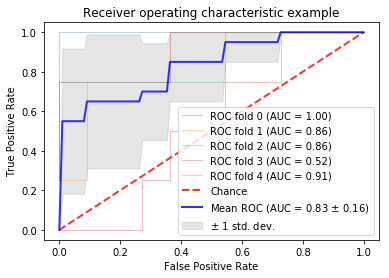

In [35]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedShuffleSplit

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.1)
classifier = svm.SVC(kernel='rbf', C=10, probability=True, gamma = 0.0001,
                     random_state=42)
#classifier = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()